# Computer Infrastructure - Weather Data Automation  
**Author:** Marcella Morgan  

![Met Éireann Blocking Data Requests](met_eireann.png)




This notebook outlines the tasks I completed for the Computer Infrastructure module of the [Higher Diploma in Science in Data Analytics given by ATU Galway-Mayo](https://www.gmit.ie/higher-diploma-in-science-in-computing-in-data-analytics). My lecturer was [Ian McLoughlin](https://github.com/ianmcloughlin). The module focuses on three main areas:

1. **Command Line Tools**: Learning and using commands to manipulate files, create directories, and work with data.  
2. **Bash Scripting**: Automating repetitive tasks, such as downloading weather data and saving it with timestamps.  
3. **Automation with GitHub Actions**: Setting up a workflow that runs the script daily and commits the results back to my repository.  

Each task builds on the last, starting with simple commands and leading up to an automated solution. Along the way, I ran into a few challenges, from Git ignoring empty folders to formatting timestamps and learning how to make scripts executable.  

I’ll go through each task, explaining the commands, what they do, and how I tackled any issues I ran into.  

Credits: Image of Met Éireann cowering behind a firewall while demonic students hurl hundreds of spear-like data requests at it was created with DALL·E




## Task 1: Creating a Directory Structure  

This task was about setting up the initial structure for the project. I created a directory named `data` with two subdirectories: `timestamps` and `weather`. These directories are used to store the files generated or downloaded for the tasks.

I used the `mkdir` command to create the directories and `cd` to navigate between them. One challenge I faced was that Git doesn’t recognise empty directories, so I had to add placeholder files to make sure they were included in version control.

#### Code:
```bash
# Create the directory structure
mkdir -p data/timestamps data/weather

# Navigate to the 'data' directory
cd data

# Check the structure
ls
```

**Issue**: Git doesn’t recognise empty directories, which was really confusing at first. After some searching, I found out you need to add a placeholder file to commit an empty directory.  

### Resources:

[How to add empty directories in Git](https://www.geeksforgeeks.org/how-to-add-an-empty-directory-to-a-git-repository/)
https://mspoweruser.com/cmd-create-folder/
https://learn.microsoft.com/en-us/windows-server/administration/windows-commands/mkdir
post on how to create multiple directories:
https://askubuntu.com/questions/731721/is-there-a-way-to-create-multiple-directories-at-once-with-mkdir
post on how to do this in python 
https://www.freecodecamp.org/news/creating-a-directory-in-python-how-to-create-a-folder/

### Task 2: Timestamps

In this task, I used the `date` command to output the current date and time into a file called `now.txt`. The goal was to learn how to append data to a file using the `>>` operator, ensuring the file isn’t overwritten. I repeated this step ten times and then used the `more` command to verify the contents of the file.

```bash
# Navigate to the 'timestamps' directory
cd data/timestamps

# Output the current date and time into a file called now.txt
date >> now.txt

# Verify the contents of now.txt
more now.txt
```

Issues I Faced:
 - Initially, I used the '>' operator instead of '>>', which overwrites the file rather than appending to it. I had to redo the task once I realised my mistake.



### Resources that helped:
https://learn.microsoft.com/en-us/windows-server/administration/windows-commands/date
https://tldp.org/LDP/abs/html/special-chars.html


https://learn.microsoft.com/en-us/windows-server/administration/windows-commands/date

creating files:
https://www.redhat.com/sysadmin/create-delete-files-directories-linux

issues around using touch in powershell
https://stackoverflow.com/questions/67659993/touch-command-not-working-what-should-i-use-instead/67665941#67665941

changing default terminal
https://stackoverflow.com/questions/69040449/how-to-change-default-terminal-in-vs-code




### Task 3: Formatting Timestamps

This task involved formatting the timestamps using the `date` command. I needed to output the date and time in a custom format: `YYYYmmdd_HHMMSS`. This is a common format used for filenames and logs as it’s both compact and sortable. The formatted timestamps were appended to a file called `formatted.txt`.

```bash
# Navigate to the 'timestamps' directory
cd data/timestamps

# Output the current date and time in custom format and append to formatted.txt
date +"%Y%m%d_%H%M%S" >> formatted.txt

# View the contents of formatted.txt
more formatted.txt
```

Issues I Faced:
- I initially struggled with understanding the formatting syntax for the `date` command.
- The `man` command wasn’t working in my terminal, so I had to use `--help` to access the formatting options instead.

### Resources that helped:
https://stackoverflow.com/questions/51262422/git-bash-no-man-command

### Task 4: Creating Timestamped Files

This task was about creating empty files with timestamped filenames in the format `YYYYmmdd_HHMMSS.txt`. I achieved this by embedding the `date` command inside the `touch` command. This was a useful way to practise combining commands in the shell.

```bash
# Navigate to the 'timestamps' directory
cd data/timestamps

# Use the date command to create a timestamped file
touch $(date +"%Y%m%d_%H%M%S").txt

# Verify the file was created
ls
```
Issues I Faced:
- Initially, I forgot to use the $(...) syntax to embed the `date` command inside `touch`.
- I also had to review how to escape special characters in Bash to avoid errors.

### Resources




### Task 5: Downloading Weather Data

In this task, I used the `wget` command to download the latest weather data for the Athenry weather station from Met Éireann. The data was saved in JSON format to a file named `weather.json`.

```bash
# Navigate to the 'weather' directory
cd data/weather

# Use wget to download the weather data
wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```



### Task 6: Timestamping the Data

For this task, I modified the wget command to save the weather data with a timestamped filename in the format YYYYmmdd_HHMMSS.json. This ensures that every download has a unique filename.

```bash
# Download the weather data with a timestamped filename
wget -O $(date +"%Y%m%d_%H%M%S")_athenry.json https://prodapi.metweb.ie/observations/athenry/today

# Verify the file
ls
```


### Resources:

## Task 7: Writing the Weather Script

This task involved writing a Bash script called weather.sh to automate the process of downloading weather data and saving it with a timestamped filename. I made the script executable using chmod.

```bash
# Bash script: weather.sh
#!/bin/bash
cd data/weather
wget -O $(date +"%Y%m%d_%H%M%S")_athenry.json https://prodapi.metweb.ie/observations/athenry/today

# Make the script executable
chmod +x weather.sh

# Run the script
./weather.sh
```

Issues I faced:

When I first tried to run the weather.sh script, I ran into a couple of problems. At first, I wasn’t sure how to actually execute the script in the terminal—I didn’t realise you need to use ./ before the script name to tell the terminal to run it from the current directory. That was an easy fix once I figured it out.

The next issue was with the wget command, which wasn’t recognised. It turned out that wget wasn’t installed on my system, which is something I didn’t expect since it’s such a standard tool. After spending a bit of time trying to fix this locally, I realised it was easier to switch to GitHub Codespaces, where all the tools are already pre-installed and set up. Once I moved the project to Codespaces, everything ran smoothly, and I could execute the script without any further problems.

It was a good reminder that environment issues can slow you down, and having a consistent setup (like Codespaces) is worth it!

## Task 8: Project

For the project, I automated the `weather.sh` script so it runs daily and saves the weather data with timestamped filenames. This was done using GitHub Actions, which allowed the script to execute automatically on a schedule.

```yaml
# GitHub Actions Workflow: .github/workflows/weather-data.yml
name: Fetch Weather Data

on:
  schedule:
    - cron: '0 08 * * *'  # Runs daily at 8:00 AM
  workflow_dispatch:  # Allows manual trigger of the workflow

jobs:
  fetch-weather:
    runs-on: ubuntu-latest
    steps:
    - name: Checkout repository
      uses: actions/checkout@v3

    - name: Run weather script
      run: |
        git config --global user.name "Your Name"
        git config --global user.email "youremail@example.com"
        chmod +x weather.sh
        ./weather.sh

    - name: Commit and push changes
      run: |
        git add data/weather/*.json
        git commit -m "Automated weather data update"
        git push
```

When I first tried to set up the GitHub Actions workflow to push the weather data back to my repository, I kept running into a permissions issue. Initially, I tried using the GITHUB_TOKEN for authentication in the workflow, but for some reason, it still didn’t work. After a bit of troubleshooting, I realised that the repository’s workflow permissions were set to read-only, which was blocking the push.

To fix this, I updated the repository settings to allow Read and Write permissions for workflows. Once that was sorted, I re-ran the workflow, and it worked perfectly—new weather files were being created and pushed to the repository automatically! A good reminder to check your settings when something doesn’t seem to be working.


### Resources
github token
https://docs.github.com/en/actions/writing-workflows/choosing-what-your-workflow-does/controlling-permissions-for-github_token

## Task 9: Weather Data Analysis

For this task I explored the weather data retrieved from Met Éireann for Athenry using a script automated with GitHub Actions. The goal is to demonstrate data exploration and analysis with pandas, focusing on trends and key insights from the dataset. I also attempted to present the results in a polished format that would be suitable for an employer.

### Loading Data

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

df = pd.read_json('data/weather/20241218_120632_athenry.json')
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,13,05n,Rain showers,"""Rain shower""",22,-,SW,225,96,0.30,993,Wednesday,2024-12-18,00:00
1,Athenry,13,05n,Rain showers,"""Rain shower""",30,-,SW,225,94,0.70,992,Wednesday,2024-12-18,01:00
2,Athenry,12,05n,Rain showers,"""Rain shower""",22,44,SW,225,96,0.80,991,Wednesday,2024-12-18,02:00
3,Athenry,12,05n,Rain showers,"""Rain shower""",26,46,SW,225,97,0.80,991,Wednesday,2024-12-18,03:00
4,Athenry,12,09n,Rain,"""Moderate rain """,28,-,NW,315,95,1.60,993,Wednesday,2024-12-18,04:00
5,Athenry,10,46n,Light rain,"""Light rain """,20,44,W,270,93,1.90,996,Wednesday,2024-12-18,05:00
6,Athenry,10,40n,Light rain showers,"""Recent Rain""",17,-,W,270,91,0.01,999,Wednesday,2024-12-18,06:00
7,Athenry,9,04n,Cloudy,"""Cloudy""",11,-,W,270,92,0.00,1001,Wednesday,2024-12-18,07:00
8,Athenry,9,02n,Fair,"""Fair""",9,-,W,270,92,0.00,1002,Wednesday,2024-12-18,08:00
9,Athenry,9,04d,Cloudy,"""Cloudy""",11,-,W,270,91,0.00,1003,Wednesday,2024-12-18,09:00


### Looking at Data

In [113]:
dtypes_df = pd.DataFrame(df.dtypes, columns=["dtypes"])
dtypes_df.style.background_gradient()

,dtypes
name,object
temperature,int64
symbol,object
weatherDescription,object
text,object
windSpeed,int64
windGust,object
cardinalWindDirection,object
windDirection,int64
humidity,int64


**Brief Description of dataset showing count, mean, max and min values:**

In [130]:
df['date'] = pd.to_datetime(df['date'])
df['reportTime'] = pd.to_datetime(df['reportTime']).dt.time
df['windDirection'] = df['windDirection'].astype('object')
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['reportTime'].astype(str))

df.describe(include=[float, int])

C:\Users\Marcella\AppData\Local\Temp\ipykernel_17012\1379632086.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reportTime'] = pd.to_datetime(df['reportTime']).dt.time


,temperature,windSpeed,humidity,rainfall,pressure
count,12.000000,12.000000,12.000000,12.000000,12.00000
mean,10.583333,17.416667,92.916667,0.510000,997.50000
std,1.676486,8.447252,2.745520,0.668036,5.40202
min,9.000000,6.000000,88.000000,0.000000,991.00000
25%,9.000000,10.500000,91.000000,0.000000,992.75000
50%,10.000000,18.500000,92.500000,0.155000,997.50000
75%,12.000000,23.000000,95.250000,0.800000,1002.25000
max,13.000000,30.000000,97.000000,1.900000,1005.00000


In [115]:
print(df['datetime'].dtype)
print(df['reportTime'].dtype)
print(df['date'].dtype)

datetime64[ns, UTC-20:00]
datetime64[ns]
datetime64[ns]


**Checking for missing values:**

In [116]:
missing_values = df.isnull().sum()
missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_df.style.background_gradient()


,Missing Values
name,0
temperature,0
symbol,0
weatherDescription,0
text,0
windSpeed,0
windGust,0
cardinalWindDirection,0
windDirection,0
humidity,0


## Closer Look at Temperature 

In [131]:
temperature_df = df[['reportTime','temperature']].copy()
temperature_df.style.background_gradient(cmap="coolwarm")
#temperature_df.style.hide_index()


,reportTime,temperature
0,00:00:00,13
1,01:00:00,13
2,02:00:00,12
3,03:00:00,12
4,04:00:00,12
5,05:00:00,10
6,06:00:00,10
7,07:00:00,9
8,08:00:00,9
9,09:00:00,9


**Temperature over Time:**

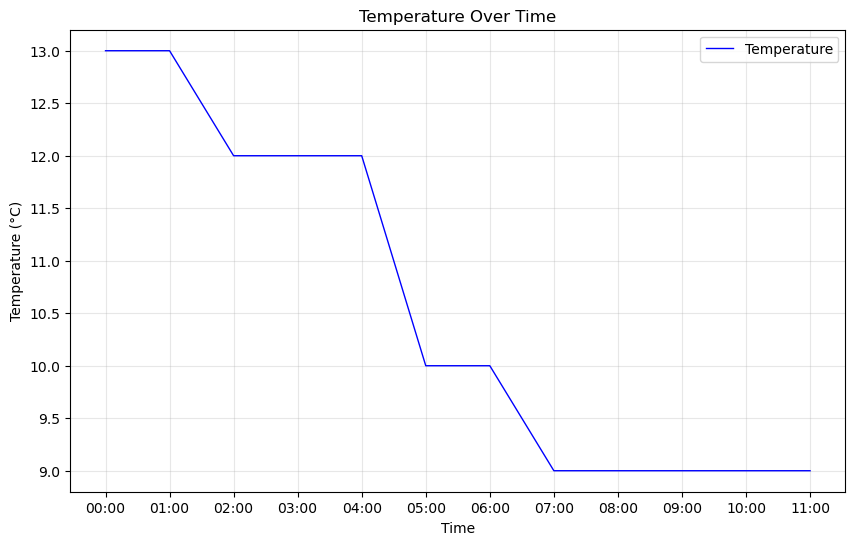

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(df['reportTime'], df['temperature'], label='Temperature', color='blue', linewidth=1)
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## END